In [1]:
# Import libraries
import pandas as pd
import mlxtend
from sklearn.linear_model import LogisticRegression
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE

In [2]:
# csv source:
# https://archive.ics.uci.edu/ml/datasets/Estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition+

obesity = pd.read_csv("obesity.csv")
obesity.head()

,Gender,Age,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,Automobile,Bike,Motorbike,Public_Transportation,Walking,NObeyesdad
0,0,21.0,1,0,2.0,3.0,1,0,2.0,0,0.0,1.0,0,0,0,0,1,0,0
1,0,21.0,1,0,3.0,3.0,1,1,3.0,1,3.0,0.0,1,0,0,0,1,0,0
2,1,23.0,1,0,2.0,3.0,1,0,2.0,0,2.0,1.0,2,0,0,0,1,0,0
3,1,27.0,0,0,3.0,3.0,1,0,2.0,0,2.0,0.0,2,0,0,0,0,1,0
4,1,22.0,0,0,2.0,1.0,1,0,2.0,0,0.0,0.0,1,0,0,0,1,0,0


In [3]:
# Split the data into predictor variables and an outcome variable
X = obesity.drop(["NObeyesdad"], axis=1) # Keep all columns (features) except the y variable
y = obesity.NObeyesdad

In [4]:
# STEP 1 - BASIC LOGISTIC REGRESSION MODEL




lr = LogisticRegression(max_iter=1000)

In [5]:
# Fit the logistic regression model
lr.fit(X, y)

LogisticRegression(max_iter=1000)

In [6]:
score_all_features = lr.score(X,y)
print('Logistic Regression Model score (all features): {}'.format(score_all_features))

Logistic Regression Model score (all features): 0.7659876835622927


In [7]:
# STEP 2 - SEQUENTIAL FOWARD SELECTION MODEL (wrapper seletion method of feature removal)




sfs = SFS(lr, k_features=12, forward=True, floating=False, scoring='accuracy', cv=0)
# there are 18 features in total. We try 

In [8]:
# Fit the sequential forward selection model to X and y
sfs.fit(X, y)

SequentialFeatureSelector(cv=0, estimator=LogisticRegression(max_iter=1000),
                          k_features=(12, 12), scoring='accuracy')

/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:233: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


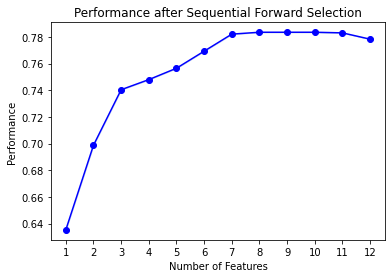

In [9]:
# Plot the model accuracy as a function of the number of features used to see how many features is optimal
plot_sfs(sfs.get_metric_dict())
plt.title('Performance after Sequential Forward Selection')
plt.show()

In [10]:
# Inspect the results of sequential forward selection
# We see that 7 features is the highest point before the flat

# See which 7 features sequential forward selection chose
print('Seven features selected after SFS: {}'.format(sfs.subsets_[7]['feature_names']))

# Print the model accuracy after doing sequential forward selection
score_sfs = sfs.subsets_[7]['avg_score']
print('Logistic Regression Model score after SFS: {}'.format(score_sfs))

Seven features selected after SFS: ('Gender', 'Age', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SCC', 'FAF')
Logistic Regression Model score after SFS: 0.7820937944102321


In [11]:
# STEP 3 - SEQUENTIAL BACKWARD SELECTION MODEL




sbs = SFS(lr, k_features=5, forward=False, floating=False, scoring='accuracy', cv=0)
# SBS is just a SFS function in reverse. We set k_features to 5 becuase 18-5=12, and we used 12 features for SFS

In [12]:
# Fit the sequential backward selection model to X and y
sbs.fit(X, y)

SequentialFeatureSelector(cv=0, estimator=LogisticRegression(max_iter=1000),
                          forward=False, k_features=(5, 5), scoring='accuracy')

/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:233: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


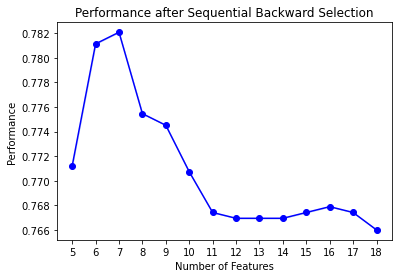

In [13]:
# Plot the model accuracy as a function of the number of features used
plot_sfs(sbs.get_metric_dict())
plt.title('Performance after Sequential Backward Selection')
plt.show()

# We see the model works best with 7 features when SBS is used. Does it select the same features?

In [14]:
# We see that 7 features is the highest point before the flat
# Inspect the results of sequential backward selection

print('Chosen features (SBS): {}'.format(sbs.subsets_[7]['feature_names']))

# Print the model accuracy after doing sequential forward selection
score_sbs = sbs.subsets_[7]['avg_score']
print('Logistic Regression Model score (after Sequential Backward Selection): {}'.format(score_sbs))

# For this model, the same 7 features were chosen as SFS so the score should be the same

Chosen features (SBS): ('Gender', 'Age', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SCC', 'FAF')
Logistic Regression Model score (after Sequential Backward Selection): 0.7820937944102321


In [15]:
# STEP 4 - RECURSIVE FEATURE ELIMINATION




rfe = RFE(estimator=lr, n_features_to_select=8)

In [16]:
# Standardize the data - * necessary for recursive feature elimination
#    this is becuase recursive feature measures the weights of coefficients, 
#    whereas SFS and SBS measure the score after addition or deletion of a feature for a set number of features


# Grab the feature names before scaling the data, because df.columns will be unavailable after scaling
features = X.columns
print(features)

# Scale the data
X = pd.DataFrame(StandardScaler().fit_transform(X))

Index(['Gender', 'Age', 'family_history_with_overweight', 'FAVC', 'FCVC',
       'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC',
       'Automobile', 'Bike', 'Motorbike', 'Public_Transportation', 'Walking'],
      dtype='object')


In [17]:
# Fit the recursive feature elimination model to X and y
rfe.fit(X, y)

RFE(estimator=LogisticRegression(max_iter=1000), n_features_to_select=8)

In [18]:
# See which features recursive feature elimination chose
#rfe_features = [f for (f, support) in zip(features, rfe.support_) if support]
rfe_features = [features[i] for i, support in enumerate(rfe.support_) if support]
print('Chosen features (recursion): {}'.format(rfe_features))

Chosen features (recursion): ['Age', 'family_history_with_overweight', 'FAVC', 'FCVC', 'CAEC', 'SCC', 'Automobile', 'Walking']


In [19]:
# Print the model accuracy after doing sequential forward selection
score_recursive = rfe.score(X, y)
print('Logistic Regression Model score (after Recursion): {}'.format(score_recursive))

Logistic Regression Model score (after Recursion): 0.7678825201326386


In [20]:
# Recursive feature elimination is similar to sequential backward selection (SBS) becuase it removes one feature at a time.
# However, it does so by testing the entire set of features at once, weighing the values of the coefficients, and dropping the least significant.
# SBS tests the entire set minus one feature, then the entire sent minus one different feature, for each feature, then drops the lowest significance.

(0.75, 0.8)

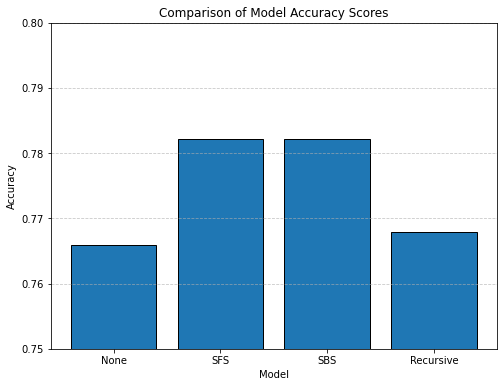

In [21]:
scores_of_models = [score_all_features, score_sfs, score_sbs, score_recursive]
wrapper_methods = ['None', 'SFS', 'SBS', 'Recursive']

plt.figure(figsize=(8, 6))
plt.bar(wrapper_methods, scores_of_models, edgecolor='black')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracy Scores')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.ylim(0.75, 0.8)

In [22]:
# For this dataset, it sequential forward selection (SFS) was the best wrapper feature selection method
# This is becuase it was much faster than SBS and achieved the same model accuracy